In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2a-data"

# **UE22CS342AA2- Data Analytics - Worksheet 2a - Simple Linear and Multiple Linear Regression**

Sanjana S - sanjanasuresh2709@gmail.com

**Academic Excellence Analysis Task**

In today's competitive educational landscape, understanding the factors that contribute to student success is more important than ever. Educators and policymakers are constantly seeking ways to enhance learning outcomes and support students in achieving their full potential. By analyzing various elements that influence academic performance, we can uncover valuable insights and develop effective strategies to improve educational practices.

Your task is to analyze the dataset to uncover the factors influencing academic success. By examining various predictors and their impact on the performance index, you can provide valuable insights that can help educators and students optimize learning strategies.

## Regression

Regression is a statistical method used to model the connection between variables, understanding how changes in one influence another. It's vital for predicting outcomes, finding patterns, and making informed decisions. 

In this worksheet we will be exploring 2 concepts. Namely:

  - Simple Linear Regression
  
  - Multiple Linear Regression
  
 

Before we go any further, let's have a look at the dataset and it's different columns

**Data Dictionary**

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
* Learning Hours: The total number of hours spent studying by each student.
* Previous Exam Scores: The scores obtained by students in previous exams.
* Club Participation: Whether the student participates in any club activities (Yes or No).
* Daily Rest Hours: The average number of hours of sleep the student had per day.
* Practice Tests Taken: The number of sample question papers the student practiced.

Target Variable:
* Academic Performance Index: A measure of the overall performance of each student.It represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


## Data Visualising

Let's visualize this all in the form of a Data Frame

In [2]:
data <- read.csv("/kaggle/input/2a-data/2a-data.csv")
head(data)

Learning_Hours Previous_Exam_Scores Club_Participation Daily_Rest_Hours
1 7              99                   Yes                9               
2 4              82                   No                 4               
3 8              51                   Yes                7               
4 5              52                   Yes                5               
5 7              75                   No                 8               
6 3              78                   No                 9               
  Practice_Tests_Taken Academic_Performance_Score
1 1                    91                        
2 2                    65                        
3 2                    45                        
4 2                    36                        
5 5                    66                        
6 6                    61

In [3]:
summary(data)

 Learning_Hours  Previous_Exam_Scores Club_Participation Daily_Rest_Hours
 Min.   :1.000   Min.   :40.00        Length:10000       Min.   :4.000   
 1st Qu.:3.000   1st Qu.:54.00        Class :character   1st Qu.:5.000   
 Median :5.000   Median :69.00        Mode  :character   Median :7.000   
 Mean   :4.993   Mean   :69.45                           Mean   :6.531   
 3rd Qu.:7.000   3rd Qu.:85.00                           3rd Qu.:8.000   
 Max.   :9.000   Max.   :99.00                           Max.   :9.000   
 Practice_Tests_Taken Academic_Performance_Score
 Min.   :0.000        Min.   : 10.00            
 1st Qu.:2.000        1st Qu.: 40.00            
 Median :5.000        Median : 55.00            
 Mean   :4.583        Mean   : 55.22            
 3rd Qu.:7.000        3rd Qu.: 71.00            
 Max.   :9.000        Max.   :100.00            

## Regression Analysis


### 1. Simple Linear Regression

Educators want to know if previous academic performance is often a strong indicator of future academic success.<br> <br>
# **a)** Create a scatter plot between the dependent variable-Previous_Exam_Score and independent variable-Academic_Performance_Score with the best-fit line passing through.            (1 mark)

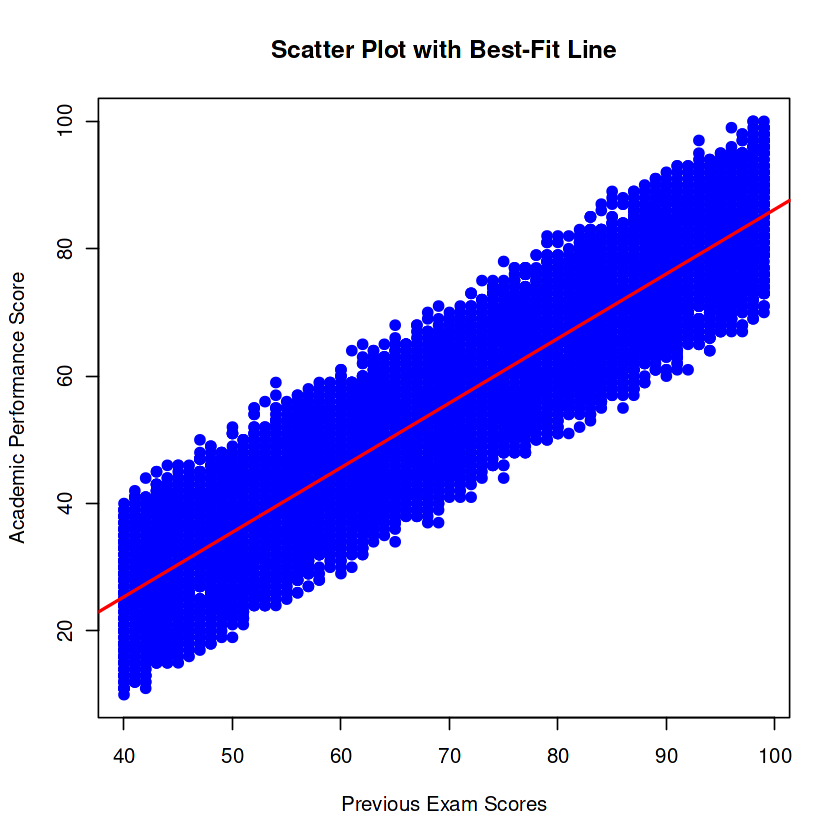

In [4]:
# Plot scatter plot with best-fit line
plot(data$Previous_Exam_Scores, data$Academic_Performance_Score,
     main = "Scatter Plot with Best-Fit Line",
     xlab = "Previous Exam Scores", 
     ylab = "Academic Performance Score", 
     col = "blue", pch = 19)

# Add best-fit line
abline(lm(Academic_Performance_Score ~ Previous_Exam_Scores, data = data), col = "red", lwd = 2)

#SEE MARKDOWN


# What do you infer from the graph?             
The scatter plot shows a clear positive linear relationship between Previous_Exam_Scores and Academic_Performance_Score.

This indicates that as a student's previous exam scores go up, their academic performance tends to improve as well.

In simple terms, students who have done well in the past are more likely to  do well academically in the this  year or future.








# b) Build a linear regression model to predict performance index based on previous scores  (1 mark).

In [5]:
#Write your code here
lrm_1 = lm(data$Academic_Performance_Score ~ data$Previous_Exam_Scores)
summary(lrm_1)


Call:
lm(formula = data$Academic_Performance_Score ~ data$Previous_Exam_Scores)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.7729  -6.5239  -0.0082   6.3689  19.4346 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -15.181799   0.319605   -47.5   <2e-16 ***
data$Previous_Exam_Scores   1.013837   0.004465   227.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.744 on 9998 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8376 
F-statistic: 5.156e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


The linear regression model was built to predict the Academic_Performance_Score based on Previous_Exam_Scores. 

The coefficient for Previous_Exam_Scores is approximately 1.0138, which means that for each unit increase in previous exam scores, the academic performance score is expected to increase by around 1.0138 units.

# **c)** Check if this model follows OLS assumptions.              (3 marks)


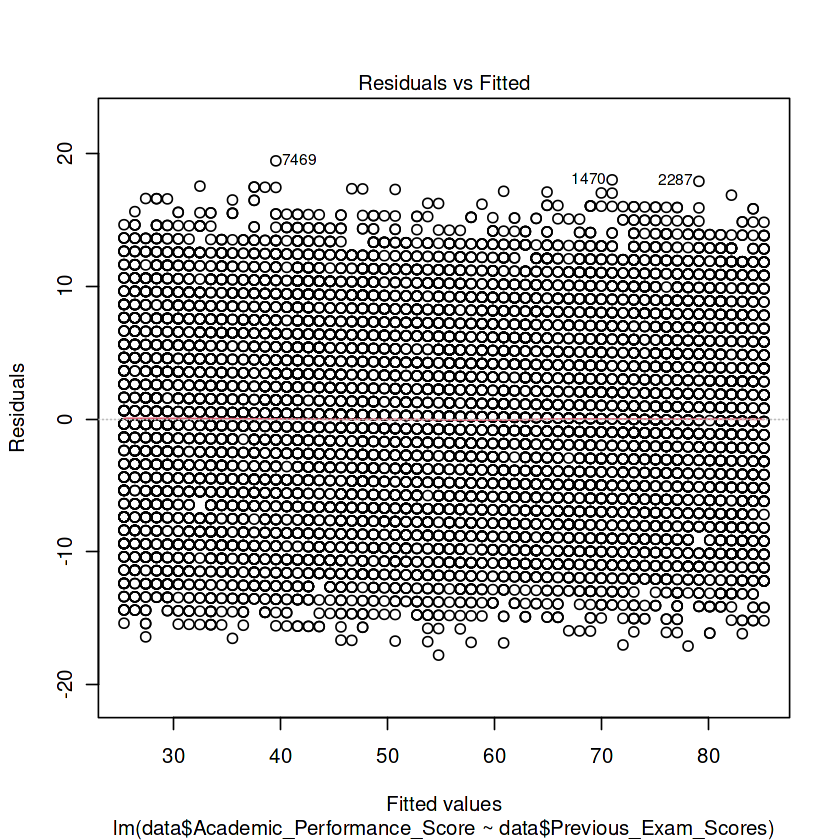

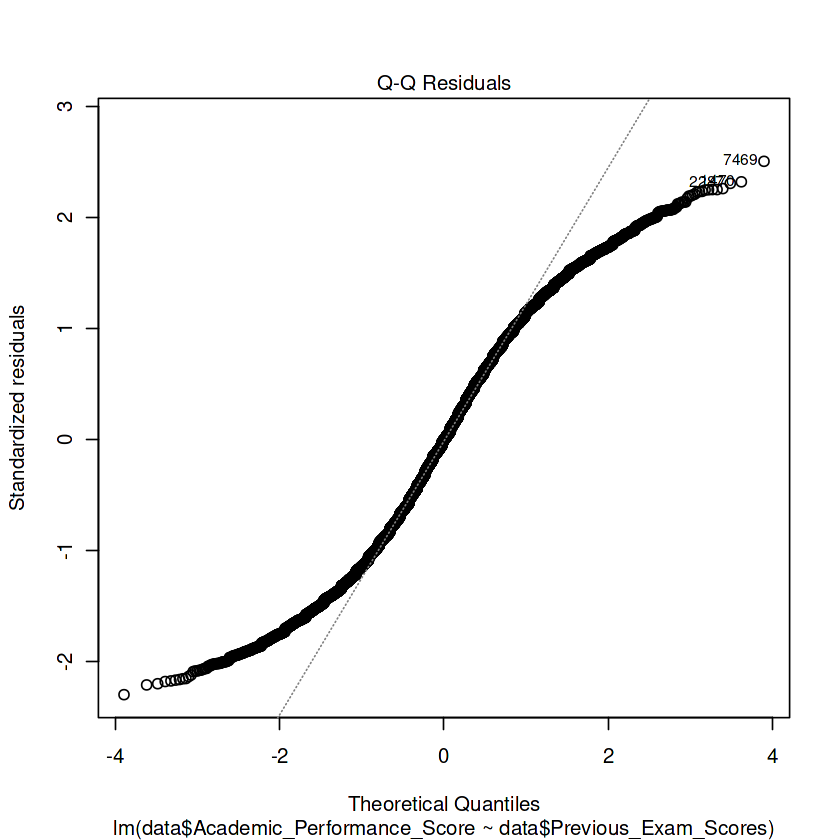

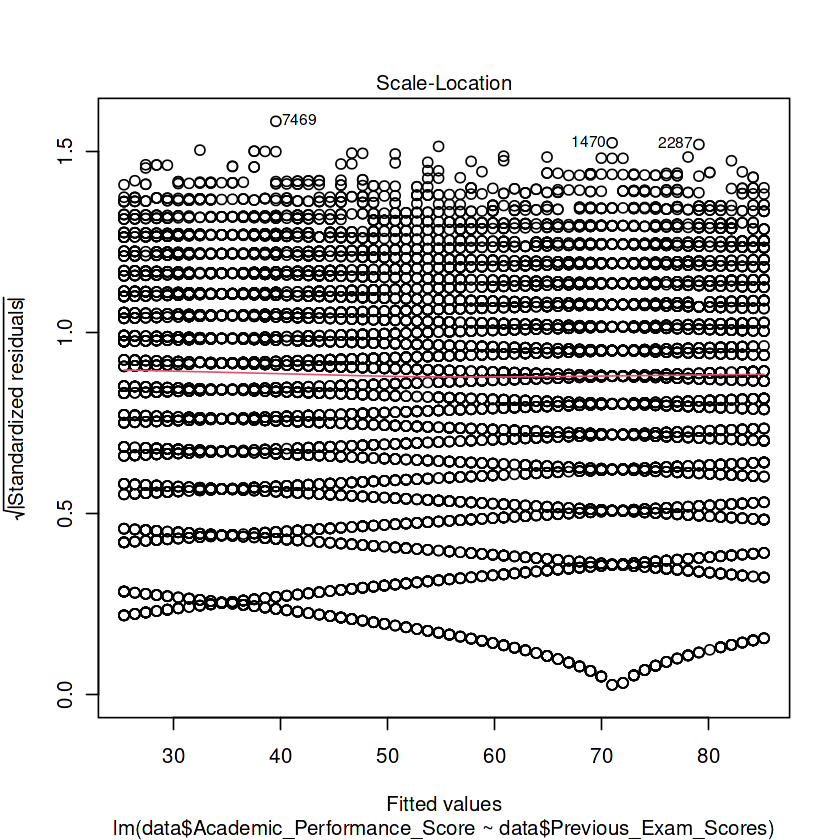

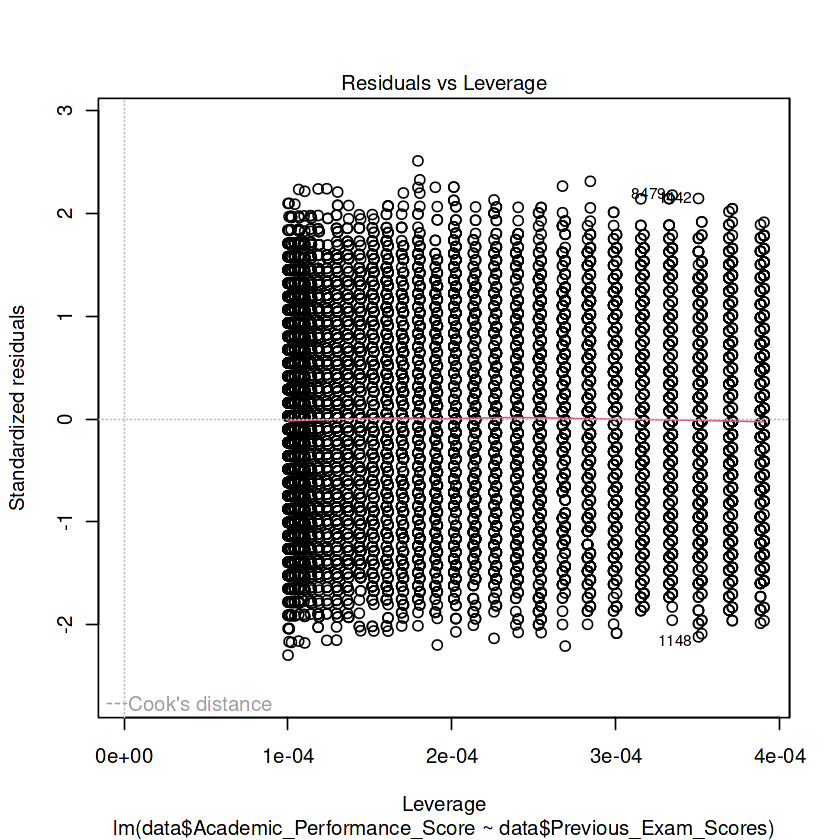

In [6]:
# Checking for OLS :

par(mfrow = c(1, 1))
plot(lrm_1)

# Does the model follow OLS assumptions?         

Yes, based on the diagnostic plots, the linear regression model mostly follows the OLS assumptions:
homoscedasticity, normality, independence of errors, and the impact of leverage.


# How did you evaluate whether the linear regression model meets the assumptions required for Ordinary Least Squares (OLS) estimation?
# Homoscedasticity:
From the above plot 1 & 3 we can see that the residuals and the fitted values are uncorrelated, as they should be in a homoscedastic linear model with normally distributed errors.

# Normality:

Plot 2: The Q-Q plot indicates that the residuals are skewed. It voilates Normality

# Independence of ERROR:
From the above plot we can infer that its not linear.
The Scale-Location plot (Plot 3) shows a relatively horizontal line with equally spread residuals, indicating that the residuals are independent of the fitted values. T

# imact of levrage :

From the fourth plot we can see the influential observations that have a high leverage and influence on the regression model.




**d)** SLR Validation:                          (1 mark) <br>
Evaluate the overall goodness-of-fit of the linear regression model.
Test whether the overall model is statistically significant using F-statistic.Mention the null and alternative hypotheses.

# To evaluate the goodness-of-fit of the linear regression model, we look at the R-squared value and the F-statistic from the model summary.

Goodness-of-fit:

The Multiple R-squared value is 0.8376, which means that around 83.76% of the variance in Academic_Performance_Score is explained by Previous_Exam_Scores. This indicates that the model has a strong fit.
Statistical significance:

F - Statiistic :
The F-statistic is 5.156e+04 on 1  with a p-value of < 2.2e-16, 
which is much smaller than 0.05. This implies that the overall model is statistically significant.
This means it fits the data.

Test whether the overall model is statistically significant using F-statistic.Mention the null and alternative hypothese?   since the p-value is much less than 0.05, we reject the null hypothesis and conclude that the predictor variable (Previous_Exam_Scores) is a significant predictor of Academic_Performance_Score.


### 2. Multiple Linear Regression                        (4 marks)

For our Multiple Linear Regression models, we could use all the attributes and try to predict the target variable. But the aim is to always predict the maximum variation in the target, with the minimum variables.

Thus, it's important to identify which features are most important to predict our target variable. Use the help of a correlogram to visually analyze the correlation between different independent variables and the one dependent variable. 


Learning_Hours Previous_Exam_Scores Club_Participation Daily_Rest_Hours
1 7              99                   Yes                9               
2 4              82                   No                 4               
3 8              51                   Yes                7               
4 5              52                   Yes                5               
5 7              75                   No                 8               
6 3              78                   No                 9               
  Practice_Tests_Taken Academic_Performance_Score Club_Participation_Numeric
1 1                    91                         2                         
2 2                    65                         1                         
3 2                    45                         2                         
4 2                    36                         2                         
5 5                    66                         1                         
6 6                    61                         1

corrplot 0.92 loaded



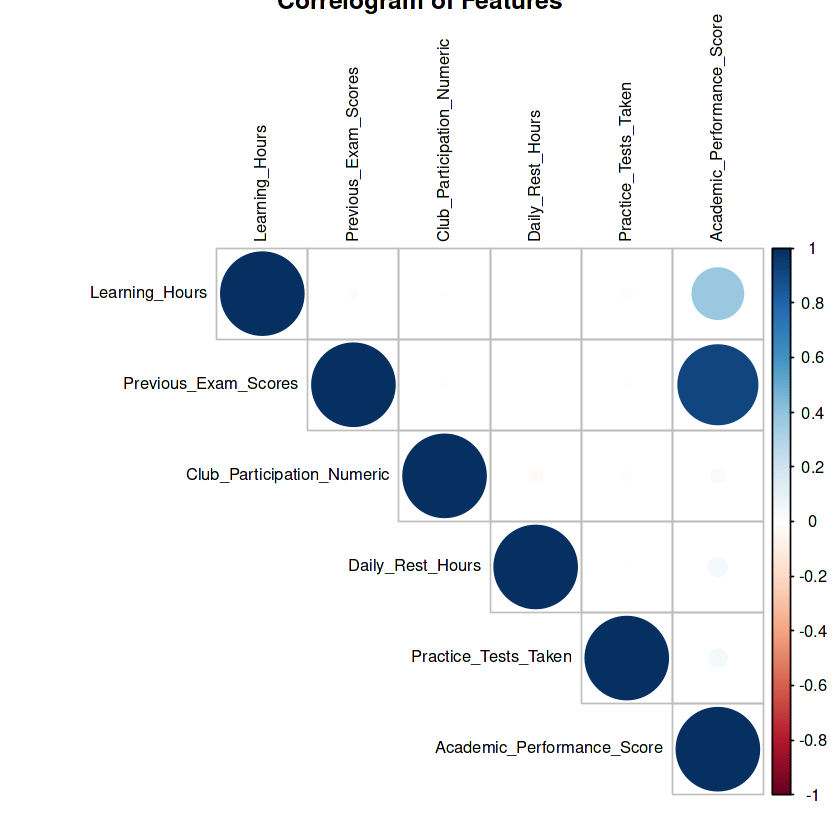

In [7]:
# Convert categorical variable to numerical
data$Club_Participation_Numeric <- as.numeric(factor(data$Club_Participation))

# Display the updated data
head(data)

# Load the necessary library for creating a correlogram
library(corrplot)

# Compute the correlation matrix
correlation_matrix <- cor(data[, c("Learning_Hours", "Previous_Exam_Scores", "Club_Participation_Numeric", "Daily_Rest_Hours", "Practice_Tests_Taken", "Academic_Performance_Score")])

# Create the correlogram
corrplot(correlation_matrix, method = "circle", type = "upper", 
         tl.col = "black", tl.cex = 0.8, 
         main = "Correlogram of Features")


**1**) Use different variables to create the Multiple Linear Regression model. <br>

In [8]:
## Write your code here
lrm_2 = lm(formula = Academic_Performance_Score ~ Learning_Hours + 
                      Previous_Exam_Scores +
                      Daily_Rest_Hours + Practice_Tests_Taken + 
                      Club_Participation_Numeric,data = data)

summary(lrm_2)



Call:
lm(formula = Academic_Performance_Score ~ Learning_Hours + Previous_Exam_Scores + 
    Daily_Rest_Hours + Practice_Tests_Taken + Club_Participation_Numeric, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6333 -1.3684 -0.0311  1.3556  8.7932 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -34.688486   0.139717 -248.28   <2e-16 ***
Learning_Hours               2.852982   0.007873  362.35   <2e-16 ***
Previous_Exam_Scores         1.018434   0.001175  866.45   <2e-16 ***
Daily_Rest_Hours             0.480560   0.012022   39.97   <2e-16 ***
Practice_Tests_Taken         0.193802   0.007110   27.26   <2e-16 ***
Club_Participation_Numeric   0.612898   0.040781   15.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.038 on 9994 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted R-squared:  0.9887 
F-statistic: 1.757e+05 on 5 and 999

In [9]:
# Select relevant columns
data1 <- data[, c('Learning_Hours', 'Previous_Exam_Scores', 'Daily_Rest_Hours', 
                   'Practice_Tests_Taken', 'Club_Participation_Numeric')]

# Compute the correlation matrix
cor_data <- cor(data1)

# Print the correlation matrix
print("Correlation matrix")
print(cor_data)


[1] "Correlation matrix"
                           Learning_Hours Previous_Exam_Scores Daily_Rest_Hours
Learning_Hours                1.000000000         -0.012389916      0.001245198
Previous_Exam_Scores         -0.012389916          1.000000000      0.005944219
Daily_Rest_Hours              0.001245198          0.005944219      1.000000000
Practice_Tests_Taken          0.017463168          0.007888025      0.003990220
Club_Participation_Numeric    0.003872541          0.008369320     -0.023283644
                           Practice_Tests_Taken Club_Participation_Numeric
Learning_Hours                      0.017463168                0.003872541
Previous_Exam_Scores                0.007888025                0.008369320
Daily_Rest_Hours                    0.003990220               -0.023283644
Practice_Tests_Taken                1.000000000                0.013102781
Club_Participation_Numeric          0.013102781                1.000000000


# Is there any correlation between independent variables.Why it is important to do this?
No. There is no correlation between independent variables. 

It is important because:
Multicollinearity: Lack of high correlation among independent variables avoids multicollinearity, which can make statistical inferences unreliable.


# Which are the most important variables to predict the Performance Index?
Based  on t vaues and coefficient , Check below 

Previous_Exam_Scores (t-value: 866.45, coefficient: 1.018434)
Learning_Hours (t-value: 362.35, coefficient: 2.852982)
Daily_Rest_Hours (t-value: 39.97, coefficient: 0.480560)
Practice_Tests_Taken (t-value: 27.26, coefficient: 0.193802)
Club_Participation_Numeric (t-value: 15.03, coefficient: 0.612898)

All considered independent variables significantly contribute to predicting the Performance Index, with Previous_Exam_Scores and Learning_Hours being the most important predictors.

**Good job with the analysis!**